In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['student-mat.csv']


In [21]:
#importing csv file into pandas dataframe
import pandas as pd
df = pd.read_csv("../input/student-mat.csv")


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [23]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [24]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


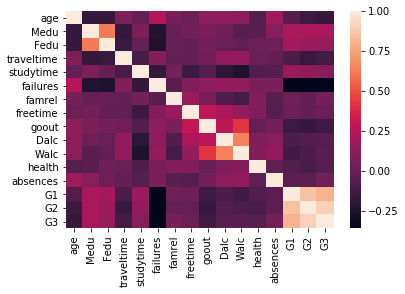

In [25]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,
        yticklabels=corr.columns)

(array([ 82., 104.,  98.,  82.,  24.,   3.,   1.,   1.,   0.]),
 array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 9 Patch objects>)

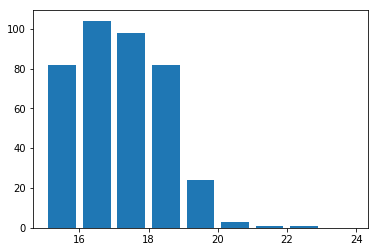

In [26]:
# bucketing students according to age
import matplotlib.pyplot as plt
bins = [15,16,17,18,19,20,21,22,23,24]
plt.hist(df["age"], bins, histtype='bar', rwidth=0.8)

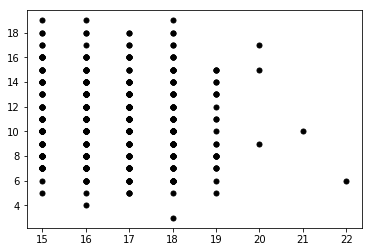

In [27]:
#scatter plot of G1 marks vs age
plt.scatter(df["age"],df["G1"], color='k', s=25, marker="o")
plt.show()

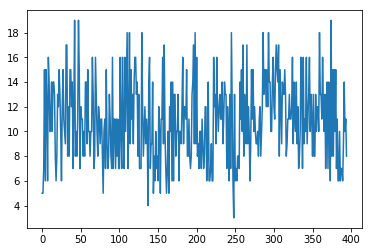

In [36]:
#scatter plot of G1 marks vs student id 
plt.plot(df.index,df["G1"])
plt.show()

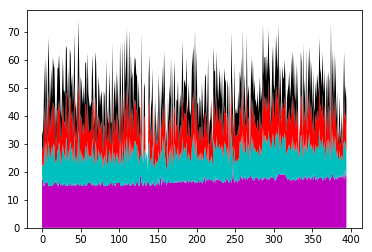

In [28]:
#stackplot of age , G1 , G2, G3 
plt.stackplot( df.index,df["age"],df["G1"],df["G2"],df["G3"], colors=['m','c','r','k'])

In [29]:
#number of females in each school
print(df[(df['school'] == "GP") & (df['sex'] == "F")]["sex"].count())
print(df[(df['school'] == "MS") & (df['sex'] == "F")]["sex"].count())

183
25


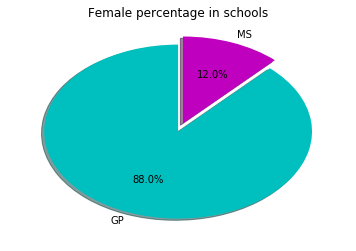

In [30]:
#pie chart showing distribution of females in schools
slices = [df[(df['school'] == "GP") & (df['sex'] == "F")]["sex"].count(),df[(df['school'] == "MS") & (df['sex'] == "F")]["sex"].count()]
activities = ["GP","MS"]
cols = ['c','m']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1),
        autopct='%1.1f%%')

plt.title('Female percentage in schools')
plt.show()

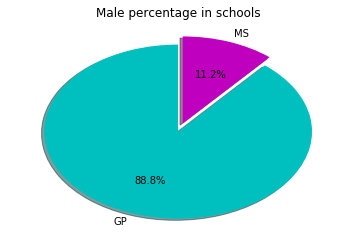

In [31]:
#pie chart showing distribution of females in schools
slices = [df[(df['school'] == "GP") & (df['sex'] == "M")]["sex"].count(),df[(df['school'] == "MS") & (df['sex'] == "M")]["sex"].count()]
activities = ["GP","MS"]
cols = ['c','m']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1),
        autopct='%1.1f%%')

plt.title('Male percentage in schools')
plt.show()

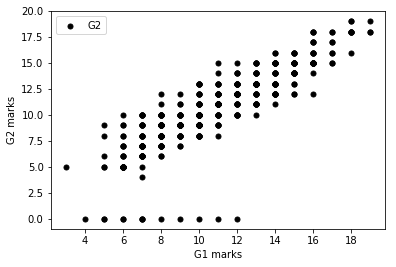

In [32]:
#scatter plot of G1 marks vs G2 marks
plt.scatter(df["G1"],df["G2"], color='k', s=25, marker="o")
plt.xlabel('G1 marks')
plt.ylabel('G2 marks')
plt.legend()
plt.show()

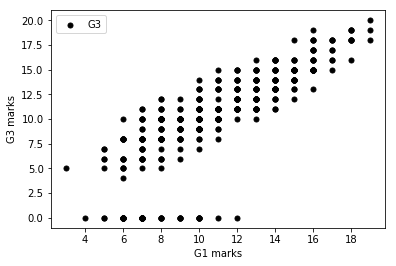

In [33]:
#scatter plot of G1 marks vs G2 marks
plt.scatter(df["G1"],df["G3"], color='k', s=25, marker="o")
plt.xlabel('G1 marks')
plt.ylabel('G3 marks')
plt.legend()
plt.show()

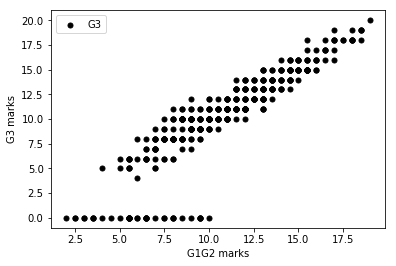

In [34]:
df["G1G2"]=(df["G1"] + df["G2"])/2
#scatter plot of G1G2 marks vs G3 marks
plt.scatter(df["G1G2"],df["G3"], color='k', s=25, marker="o")
plt.xlabel('G1G2 marks')
plt.ylabel('G3 marks')
plt.legend()
plt.show()

(array([  0., 312.,  50.,  17.,  16.]),
 array([-1,  0,  1,  2,  3,  4]),
 <a list of 5 Patch objects>)

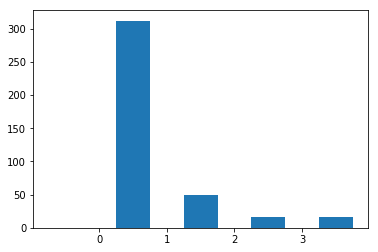

In [35]:
bins = [-1,0,1,2,3,4]
plt.hist(df["failures"], bins, histtype='bar', rwidth=0.5)